# Alexis Oduro-Domfe

## Research question/interests

I’m interested in this data set and analyzing the questions of what factors are indicative of a person’s credit score, how this can be used as reference model for credit card applicants? And why it is a important

**1. Research Question 1:** How does one's education level affect their income? (and thus their chances of getting approved for a credit card or affect their credit score)

**2. Research Question 2:** Which Gender tends to have a higher income in relation to their employment type or education level?

**3. Research Question 3:** How do different expenses (children, owning a car, or housing)  affect a person's income? (and thus their chances of getting approved for a credit card or affect their credit score)


**3. Research Question 4:** How does one's housing situation affect their income?




In [2]:
import pandas as pd
# a= eval(r.content) Never user eval for online texts
df = pd.read_csv('../data/raw/application_record.csv')
df




,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
1,5008805,M,Y,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,-12005,-4542,1,1,0,0,NaN,2
2,5008806,M,Y,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2
3,5008808,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
4,5008809,F,N,Y,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,-19110,-3051,1,0,1,1,Sales staff,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,Y,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,-22717,365243,1,0,0,0,NaN,1
438553,6840222,F,N,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-15939,-3007,1,0,0,0,Laborers,1
438554,6841878,F,N,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,-8169,-372,1,1,0,0,Sales staff,1
438555,6842765,F,N,Y,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-21673,365243,1,0,0,0,NaN,2


## Milestone 3

### Task 1 - Conduct an EDA


In [3]:
import numpy as np
import pandas as pd
import seaborn as sns #Understanding the variables
import matplotlib.pylab as plt

df = pd.read_csv('../data/raw/application_record.csv')
df.info()
print("Number of rows and columns respectively:", df.shape)
print("Columns in the dataset:", df.columns)



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 438557 entries, 0 to 438556
Data columns (total 18 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   ID                   438557 non-null  int64  
 1   CODE_GENDER          438557 non-null  object 
 2   FLAG_OWN_CAR         438557 non-null  object 
 3   FLAG_OWN_REALTY      438557 non-null  object 
 4   CNT_CHILDREN         438557 non-null  int64  
 5   AMT_INCOME_TOTAL     438557 non-null  float64
 6   NAME_INCOME_TYPE     438557 non-null  object 
 7   NAME_EDUCATION_TYPE  438557 non-null  object 
 8   NAME_FAMILY_STATUS   438557 non-null  object 
 9   NAME_HOUSING_TYPE    438557 non-null  object 
 10  DAYS_BIRTH           438557 non-null  int64  
 11  DAYS_EMPLOYED        438557 non-null  int64  
 12  FLAG_MOBIL           438557 non-null  int64  
 13  FLAG_WORK_PHONE      438557 non-null  int64  
 14  FLAG_PHONE           438557 non-null  int64  
 15  FLAG_EMAIL       

#### Summarize object and numeric variables

In [4]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))

,ID,CNT_CHILDREN,AMT_INCOME_TOTAL,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
count,438557.000000,438557.000000,438557.000000,438557.000000,438557.000000,438557.000000,438557.000000,438557.000000,438557.000000,438557.000000
mean,6022176.269842,0.427390,187524.286010,-15997.904649,60563.675328,1.000000,0.206133,0.287771,0.108207,2.194465
std,571637.023257,0.724882,110086.853066,4185.030007,138767.799647,0.000000,0.404527,0.452724,0.310642,0.897207
min,5008804.000000,0.000000,26100.000000,-25201.000000,-17531.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,5609375.000000,0.000000,121500.000000,-19483.000000,-3103.000000,1.000000,0.000000,0.000000,0.000000,2.000000
50%,6047745.000000,0.000000,160780.500000,-15630.000000,-1467.000000,1.000000,0.000000,0.000000,0.000000,2.000000
75%,6456971.000000,1.000000,225000.000000,-12514.000000,-371.000000,1.000000,0.000000,1.000000,0.000000,3.000000
max,7999952.000000,19.000000,6750000.000000,-7489.000000,365243.000000,1.000000,1.000000,1.000000,1.000000,20.000000


In [5]:
df.describe(include='object').T

,count,unique,top,freq
CODE_GENDER,438557,2,F,294440
FLAG_OWN_CAR,438557,2,N,275459
FLAG_OWN_REALTY,438557,2,Y,304074
NAME_INCOME_TYPE,438557,5,Working,226104
NAME_EDUCATION_TYPE,438557,5,Secondary / secondary special,301821
NAME_FAMILY_STATUS,438557,5,Married,299828
NAME_HOUSING_TYPE,438557,6,House / apartment,393831
OCCUPATION_TYPE,304354,18,Laborers,78240


### **Task 2 - Clean and Process Data**

In [4]:
df_cleaned = df.copy().drop(['FLAG_OWN_REALTY', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE'], axis=1)
df_cleaned

,ID,CODE_GENDER,FLAG_OWN_CAR,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,CNT_FAM_MEMBERS
0,5008804,M,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,2
1,5008805,M,Y,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,2
2,5008806,M,Y,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,2
3,5008808,F,N,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1
4,5008809,F,N,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1
...,...,...,...,...,...,...,...,...,...,...
438552,6840104,M,N,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,1
438553,6840222,F,N,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,1
438554,6841878,F,N,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,1
438555,6842765,F,N,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,2


In [7]:
# Check for duplicated entries:

if len(df_cleaned[df_cleaned.duplicated()]) > 0:
    print("No. of duplicated entries: ", len(df_cleaned[df_cleaned.duplicated()]))
    print(df_cleaned[df_cleaned.duplicated(keep=False)].sort_values(by=list(df_cleaned.columns)).head())
else:
    print("No duplicated entries found")

No duplicated entries found


### **Task 3 - Method chaining**

In [6]:
def load_and_process(url_or_path_to_csv_file):

    # Method Chain 1 (Load data and deal with missing data)

    df1 = (
          pd.read_csv('../data/raw/application_record.csv')
          .rename(columns={'CODE_GENDER': 'gender', 'FLAG_OWN_CAR': 'own_car', 'CNT_CHILDREN': 'children', 'AMT_INCOME_TOTAL': 'income',
                          'NAME_INCOME_TYPE': 'employment_type', 'NAME_EDUCATION_TYPE': 'education_level', 'NAME_FAMILY_STATUS': 'relationship_status',
                          'NAME_HOUSING_TYPE': 'Housing', 'CNT_FAM_MEMBERS': 'family_members'})
          .fillna("Inconlusive")
          .replace("F", "Female")
          .replace("M", "Male")
          .replace("Y", "Yes")
          .replace("N", "No")
        
    )

    # Method Chain 2 (Create new columns, drop others, and do processing)
    
    df2 = (
          df1.drop(['ID','FLAG_OWN_REALTY', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'FLAG_MOBIL', 'FLAG_WORK_PHONE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE'], axis=1)
    )

    # Make sure to return the latest dataframe

    return df2 

In [7]:
load_and_process("../data/raw/")

,ID,gender,own_car,children,income,employment_type,education_level,relationship_status,Housing,family_members
0,5008804,Male,Yes,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,2
1,5008805,Male,Yes,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,2
2,5008806,Male,Yes,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,2
3,5008808,Female,No,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1
4,5008809,Female,No,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1
...,...,...,...,...,...,...,...,...,...,...
438552,6840104,Male,No,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,1
438553,6840222,Female,No,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,1
438554,6841878,Female,No,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,1
438555,6842765,Female,No,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,2


### **Task 4 - Visualizations**

In [16]:
new_df = load_and_process("../data/raw/")
new_df.describe(include='float64').T

,count,mean,std,min,25%,50%,75%,max
income,438557.0,187524.28601,110086.853066,26100.0,121500.0,160780.5,225000.0,6750000.0


In [17]:
new_df.describe(include='int64').T

,count,mean,std,min,25%,50%,75%,max
ID,438557.0,6.022176e+06,571637.023257,5008804.0,5609375.0,6047745.0,6456971.0,7999952.0
children,438557.0,4.273903e-01,0.724882,0.0,0.0,0.0,1.0,19.0
family_members,438557.0,2.194465e+00,0.897207,1.0,2.0,2.0,3.0,20.0


In [23]:
new_df.describe(include='object').T

,count,unique,top,freq
gender,438557,2,Female,294440
own_car,438557,2,No,275459
employment_type,438557,5,Working,226104
education_level,438557,5,Secondary / secondary special,301821
relationship_status,438557,5,Married,299828
Housing,438557,6,House / apartment,393831


In [30]:
new_df.education_level.unique()


array(['Higher education', 'Secondary / secondary special',
       'Incomplete higher', 'Lower secondary', 'Academic degree'],
      dtype=object)

In [29]:
new_df.Housing.unique()

array(['Rented apartment', 'House / apartment', 'Municipal apartment',
       'With parents', 'Co-op apartment', 'Office apartment'],
      dtype=object)

In [10]:
final_df = load_and_process("../data/raw/")
final_df

,ID,gender,own_car,children,income,employment_type,education_level,relationship_status,Housing,family_members
0,5008804,Male,Yes,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,2
1,5008805,Male,Yes,0,427500.0,Working,Higher education,Civil marriage,Rented apartment,2
2,5008806,Male,Yes,0,112500.0,Working,Secondary / secondary special,Married,House / apartment,2
3,5008808,Female,No,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1
4,5008809,Female,No,0,270000.0,Commercial associate,Secondary / secondary special,Single / not married,House / apartment,1
...,...,...,...,...,...,...,...,...,...,...
438552,6840104,Male,No,0,135000.0,Pensioner,Secondary / secondary special,Separated,House / apartment,1
438553,6840222,Female,No,0,103500.0,Working,Secondary / secondary special,Single / not married,House / apartment,1
438554,6841878,Female,No,0,54000.0,Commercial associate,Higher education,Single / not married,With parents,1
438555,6842765,Female,No,0,72000.0,Pensioner,Secondary / secondary special,Married,House / apartment,2


In [12]:
final_df.to_csv("../data/processed/creditdata.csv", index = False)


#### Analysis

- Most credit card users/applicants seem to be females (294440 out of 438557 applicants)
- Most credit card applicants do not own a car (and likely maybe use public transport and thus less expenses)
- Most credit card applicants are working/employed (ability to pay off credit card charges since they're employed)
- Most credit card applicants' education status is at most High school/Secondary school (might limit income & thus their credit card eligibility)
- Most credit card applicants are married (therefore might have to split costs)
- Most credit card applicants have a owned House/Apartment (thus mortgage might be an expense but also an asset)

#### Pandas Profiling Analysis

- with < 75% zeros in CNT_CHILDREN, we can conclude most applicants in this dataset are not parents and very few have 1+ children.
- The PS2 had the highest amount of games sold holding a stagering count of 1140. This holds true as the PS2 was one of the most well sold consoles of all time.
- Most/50% of applicants have a total income in the $ 100000 - $ 200000 region, which doesn't really correlate with the average education status. But perhaps most of them are just older adults who have been working for longer and rose up the ranks through the years.




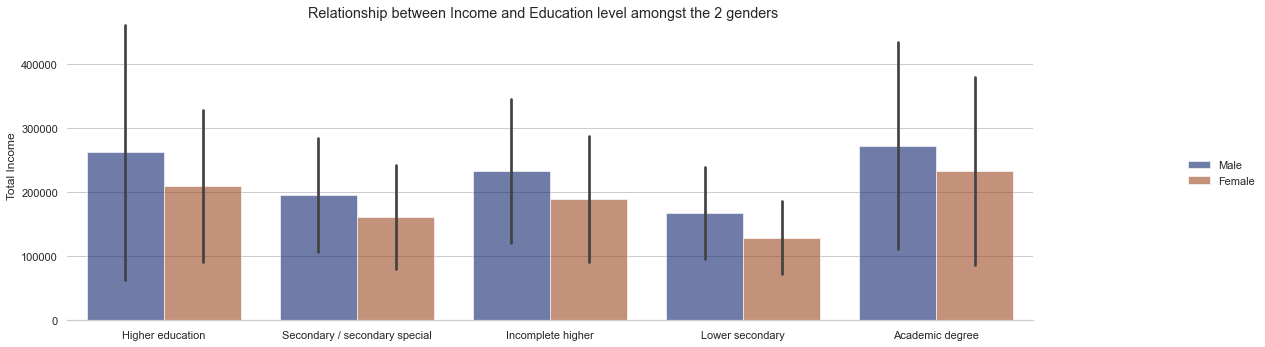

In [31]:
import seaborn as sns
sns.set_theme(style="whitegrid")

# Draw a nested barplot by education status and sex
g = sns.catplot(
    data=new_df, kind="bar",
    x="education_level", y="income", hue="gender",
    ci="sd", palette="dark", alpha=.6, height=6
)
g.despine(left=True)
g.set_axis_labels("", "Total Income")
g.legend.set_title("")
g.fig.suptitle("Relationship between Income and Education level amongst the 2 genders")
g.fig.set_size_inches(20,5)
plt.show()


#### **Graph Analysis 1**

The graph shows us total income based on different education levels has a prominent relationship. Those with an Academic degree (phd/masters) on average earn more with those in higher education (bachelors/diploma) in second. Moreover, it also shows us how Male bias this dataset is, with males earning more on average in every education level even though most applicants are females. Thus, perhaps gender discrimination is something to consider. All in one can see to likely increase your credit card eligibility chances, you would have to be male, with at least a higher education level since they correlate to higher income.

<AxesSubplot:title={'center':'Countplot of Income Type'}, xlabel='Count', ylabel='Income Type'>

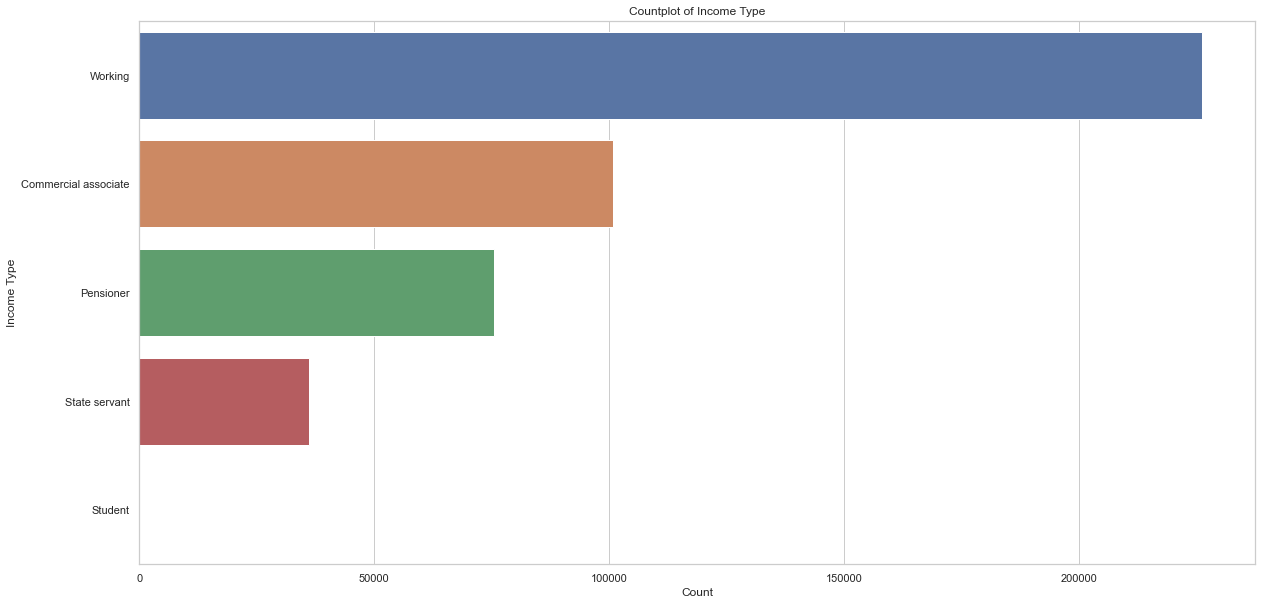

In [33]:
a4_dims = (20, 10)
fig, ax = plt.subplots(figsize=a4_dims)
ax = sns.countplot(y ='NAME_INCOME_TYPE' ,data = df_cleaned)
ax.set_title("Countplot of Income Type")
ax.set_xlabel("Count")
ax.set_ylabel("Income Type")
ax

#### **Graph Analysis 2**

The countplot shows us how many more applicants are working/employed, further solidifying the fact that the likelihood your credit score is higher and that your chances for credit card eligibility are higher. The count of each type of employment type has a similar trend to the income by education level graph, meaning banks would likely grant people who are both working and have high income.

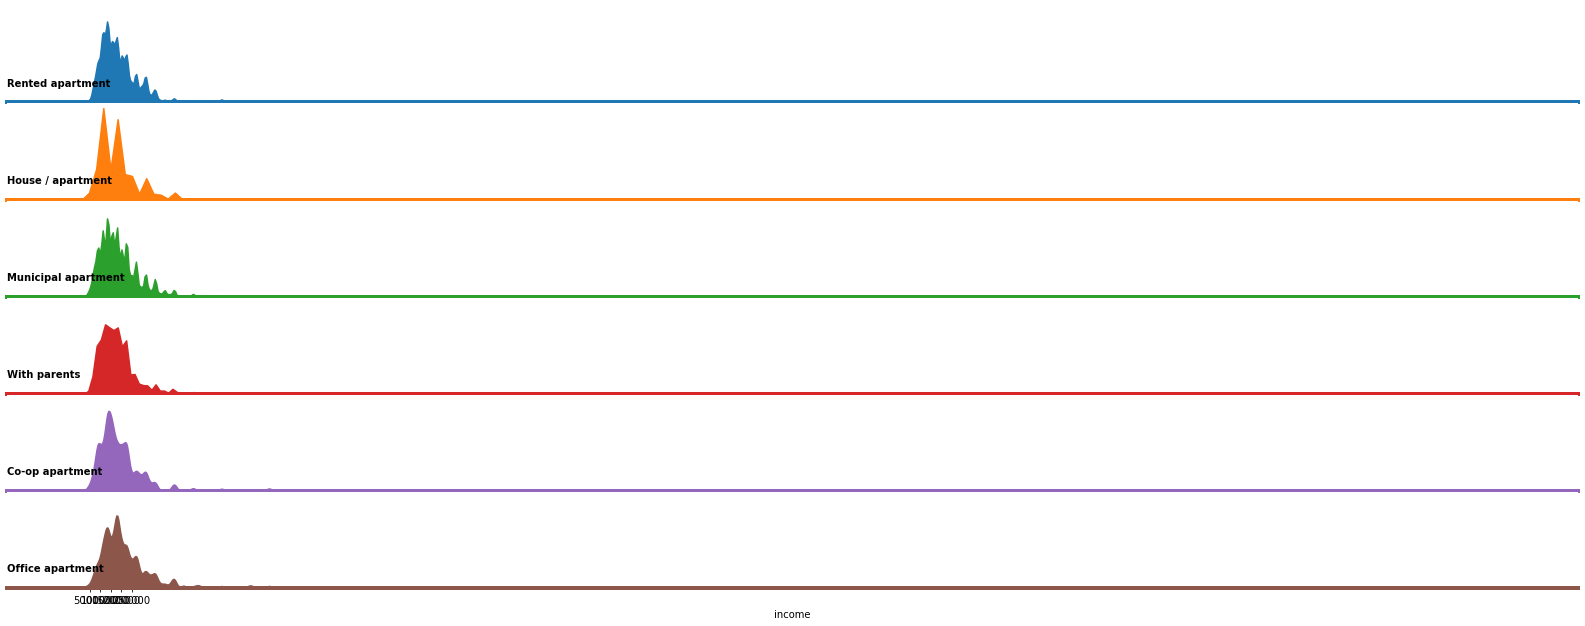

In [27]:
def label(x, color, label) :
    ax = plt.gca()
    ax.text(0, .2, label, fontweight='bold', color='black',
            ha = 'left', va='center', transform=ax.transAxes)
    
g = sns.FacetGrid(final_df, row ='Housing', hue='Housing', aspect=15, height=1.5)
g.map(sns.kdeplot, 'income', bw_adjust=.5, clip_on=False, fill=True, alpha=1, linewidth=1.5)
g.map(plt.axhline, y=0, linewidth=4, clip_on=False)
g.map(label, 'income')
g.fig.subplots_adjust(hspace=0.01)
g.set_titles('')
g.set(yticks=[], ylabel='', xticks=[50000, 100000, 150000, 200000, 250000], xlabel='income')
g.despine(bottom=True, left=True)

#### **Graph Analysis 3**

The graph doesn't really show a difference between the different income amongst those with various housing situations. This is a little unexpected as I expected those with live in the House/Apartment catagory to have most in a hihger income bracket since ability to buy or sustain a home requires a higher income. However, what's interesting to see is that those who live with their parents are condensed in having similar income and is not as varied as the other housing categories. This makes sense as those who live with their parents are probably able to save most of their income as housing is not an expense/worry for them. Which in turn might affect their likelihood of attaining a credit card/improving their credit score.

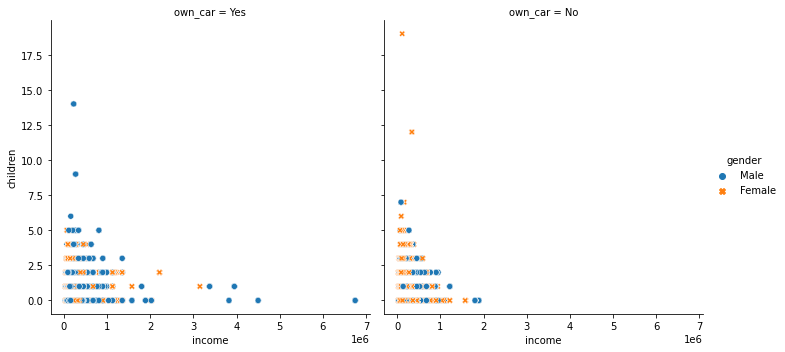

In [38]:
sns.relplot(
    data=final_df, x="income", y="children",
    col="own_car", hue="gender", style="gender",
    kind="scatter"
)



#### **Graph Analysis 4**

The graph shows a negative correlation between the income of an applicant and how many children they have. As the children count increases, their income decreases. This makes sense as raising a child is essentially a huge expense for a parent which might affect their income. One can even see the data point of the person with the highest income does not have a child. However, what is unexpected is that the trend of the scatter plot isn't really affected for an applicant who has or doesn't have a car. This might be because the cost of having a car is probably outweighed by the cost of rasing a child. Therefore, we can conclude that those who have children might be hindered in terms of their likelihood of attaining a credit card/improving their credit score since their income is lower

Text(0.5, 0, 'income')

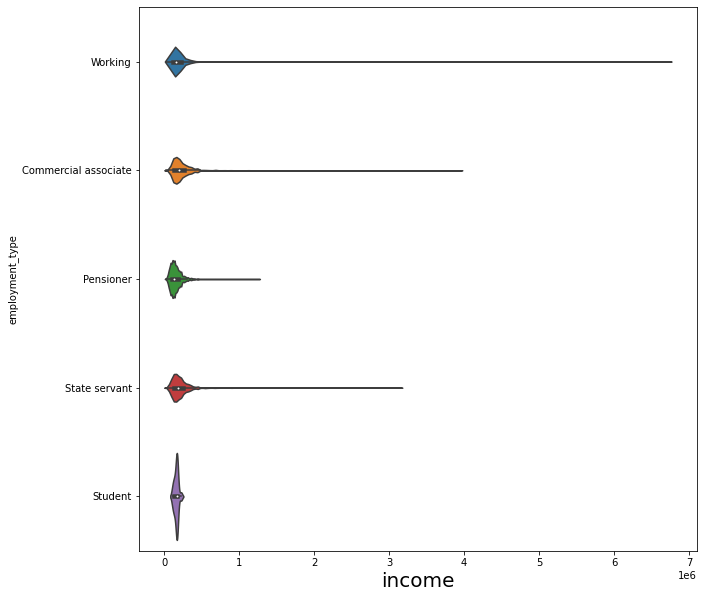

In [41]:

plt.figure(figsize = (10, 10))
p = sns.violinplot(x=final_df['income'], y = final_df['employment_type'], data = final_df)
p.set_xlabel('income', fontsize = 20)